D:\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
D:\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
D:\anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Feature: 0, Score: 0.26544
Feature: 1, Score: 0.13668
Feature: 2, Score: 0.18858
Feature: 3, Score: 0.15321
Feature: 4, Score: 0.08087
Feature: 5, Score: 0.00664
Feature: 6, Score: 0.16858


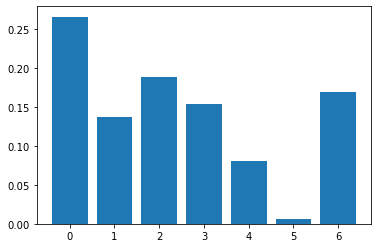

0.5879865516099455
0.8610495882588527
2.146104053687757


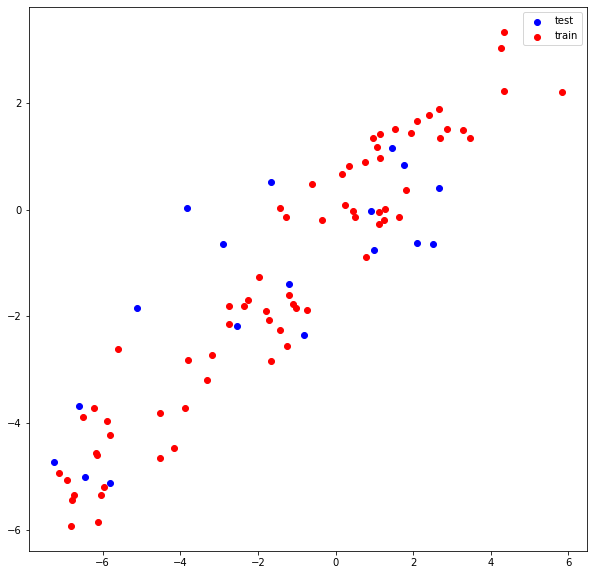

In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler  # 标准化工具
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , KFold , cross_val_predict
from sklearn.model_selection import train_test_split
import sklearn.tree as st
import sklearn.metrics as sm
import sklearn.tree as tree
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.ensemble as se
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics
import pandas as pd 
from sklearn import preprocessing  
from sklearn.ensemble import RandomForestRegressor
import xgboost  as xgb
from sklearn import tree
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
data = pd.read_csv("C:/Users/da070/Desktop/Mrs.zhang/1.csv")
data.head()
x = data.drop(['Number'],axis=1)
y = data[['Number']]
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=30)
model = GradientBoostingRegressor(n_estimators=80,max_features=5,max_depth=5,max_leaf_nodes=4,random_state=42)
model.fit(x_train,y_train)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 
plt.bar([x for x in range(len(importance))], importance) 
plt.savefig('F:/fig2/importancegbdt1.tif',dpi=300)
plt.show()
pre_test = model.predict(x_test) 
pre_train = model.predict(x_train)
r2_score = ms.cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
r2_score_train = ms.cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(r2_score)
print(r2_score_train)
rmse_tr_lr=mean_squared_error(y_test,pre_test,squared=False)
print(rmse_tr_lr)
plt.figure(figsize=(10,10))
plt.scatter(y_test,pre_test,color='blue',label='test') 
plt.scatter(y_train,pre_train,color='red',label='train')
plt.legend()  
y_test=pd.DataFrame(data=y_test)
pre_test=pd.DataFrame(data=pre_test)
pre_train=pd.DataFrame(data=pre_train)
#y_test.to_csv('F:/data2/RF1__test.csv')  
#pre_test.to_csv('F:/data2/RF1_pred.csv') 
pre_train.to_csv('F:/data3/gbdt1_pred_train.csv') 
y_train.to_csv('F:/data3/gbdt1__y_train.csv') 